In [26]:
import pandas as pd 
import matplotlib as plt
!pip install seaborn
import seaborn as sns


data_sayer = pd.read_csv('data_sayer_NP.csv')
data_sayer.head()

,OrderID,UnitID,UnitType,UnitYear,kMS,OpenedDate,lagdias,laghoras,Jobcode,JobType,JobTypeSummary,RepReason,COMPLAINT,DESCRIPTION,TipoLinea,NumParte,PartUnitCost,TOTAL,CITA
0,QRO-00032562,1801,TRACTOR,2021,244708.0,2022-01-03 13:34:00,38,914,000013 - Correctivo Tractos,CORRECTIVO,CORRECTIVO,MC,CORRECTIVO,PLUMA LIMPIAPARA BRISAS 22,PART,BO3002200,382.130,443.260,CON CITA
1,QRO-00032562,1801,TRACTOR,2021,244708.0,2022-01-03 13:34:00,38,914,000041 - Servicio Preventivo A - LT,PREVENTIVO,PREVENTIVO,PM,PREVENT VENC,SERVICIO PREVENTIVO A LT,PART,LF14001NN,325.890,378.030,CON CITA
2,QRO-00032562,1801,TRACTOR,2021,244708.0,2022-01-03 13:34:00,38,914,000041 - Servicio Preventivo A - LT,PREVENTIVO,PREVENTIVO,PM,PREVENT VENC,SERVICIO PREVENTIVO A LT,PART,2510993C2,865.000,994.750,CON CITA
3,QRO-00032562,1801,TRACTOR,2021,244708.0,2022-01-03 13:34:00,38,914,000041 - Servicio Preventivo A - LT,PREVENTIVO,PREVENTIVO,PM,PREVENT VENC,SERVICIO PREVENTIVO A LT,PART,G CHASIS E-LIT GRAMOS,0.057,162.459,CON CITA
4,QRO-00032562,1801,TRACTOR,2021,244708.0,2022-01-03 13:34:00,38,914,000041 - Servicio Preventivo A - LT,PREVENTIVO,PREVENTIVO,PM,PREVENT VENC,SERVICIO PREVENTIVO A LT,PART,15W-40,51.460,2323.478,CON CITA


In [27]:
####################################### Ajustes de datos
# Asegurar el formato correcto de las columnas
# Convertir 'OpenedDate' a formato datetime
data_sayer['OpenedDate'] = pd.to_datetime(data_sayer['OpenedDate'])
# Convertir 'laghoras' a valores numéricos para evitar errores
data_sayer['laghoras'] = pd.to_numeric(data_sayer['laghoras'], errors='coerce')

# Agrupar los datos por 'UnitID' y 'UnitType' para obtener métricas agregadas
sayer_maint2_byUnit = data_sayer.groupby(['UnitID', 'UnitType']).agg(
    RepairCount=('OpenedDate', 'size'),  # Conteo de reparaciones por unidad
    RepairDates=('OpenedDate', lambda x: list(
        x + pd.to_timedelta(data_sayer.loc[x.index, 'laghoras'], unit='h')))  # Agregar horas a las fechas de apertura
).reset_index()

AttributeError: module 'matplotlib' has no attribute 'title'

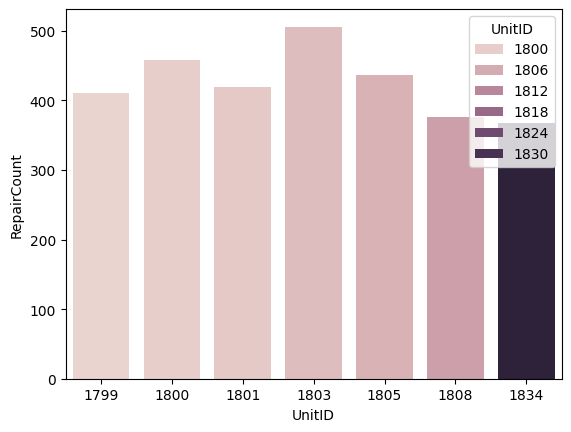

In [28]:
# Grafico de barras para la cantidad de reparaciones por unidad

# Asignar el tamaño de la figura


# Sample evenly spaced colors from the colormap


# Crear el grafico de barras
sns.barplot(data=sayer_maint2_byUnit[sayer_maint2_byUnit['UnitType'] == 'TRACTOR']
                                    [['UnitID','RepairCount']]
                                    .reset_index(drop=True)
                                    .sort_values('RepairCount', ascending=False),
            x='UnitID',
            y='RepairCount',
            hue='UnitID')

# Informacion del grafico
plt.title('Cantidad de reparaciones por unidad de la flota de Sayer Full')
plt.xlabel('Unidad')
plt.ylabel('Cantidad de reparaciones')

plt.show()

In [30]:
from matplotlib.colors import LinearSegmentedColormap
positions = [0, 0.5, 1]
colors = ['midnightblue', 'lightgray', 'darkorange']
tdr_cmap = LinearSegmentedColormap.from_list('tdr_cmap', list(zip(positions, colors)))


data_sayer['ClosedMonth'] = (data_sayer['OpenedDate'] + pd.to_timedelta(data_sayer['lagdias'], unit='d')).dt.month
# Grafica de la cantidad de reparaciones por mes para los distintos años
data_sayer['OpenedDate'] = pd.to_datetime(data_sayer['OpenedDate'])
# Convertir 'laghoras' a valores numéricos para evitar errores
data_sayer['laghoras'] = pd.to_numeric(data_sayer['laghoras'], errors='coerce')

data_sayer['MaintenanceYear'] = data_sayer['OpenedDate'].dt.year
# Creacion de un DataFrame para los mantenimientos del año 2022
data_sayer2_2022 = data_sayer[data_sayer['MaintenanceYear'] == 2022]

# Creacion de un DataFrame para los mantenimientos del año 2023
data_sayer2_2023 = data_sayer[data_sayer['MaintenanceYear'] == 2023]

# Creacion de un DataFrame para los mantenimientos del año 2024
data_sayer2_2024 = data_sayer[data_sayer['MaintenanceYear'] == 2024]

# Cantidad de graficas a mostrar
figure, axis = plt.subplots(1, 3, sharey=True)

# Tamaño de las graficas
figure.set_size_inches(16, 6)

# Grafica 2022
sns.countplot(data=data_sayer2_2022, ax=axis[0], x='ClosedMonth', color='gray')
axis[0].set_title('Cantidad de reparaciones por mes en 2022')
axis[0].set_xlabel('Mes')
axis[0].set_ylabel('Cantidad de reparaciones')

# Grafica 2023
sns.countplot(data=data_sayer2_2023, ax=axis[1], x='ClosedMonth', color='gray')
axis[1].set_title('Cantidad de reparaciones por mes en 2023')
axis[1].set_xlabel('Mes')
axis[1].set_ylabel('Cantidad de reparaciones')

# Grafica 2024
sns.countplot(data=data_sayer2_2024, ax=axis[2], x='ClosedMonth', color='gray')
axis[2].set_title('Cantidad de reparaciones por mes en 2024')
axis[2].set_xlabel('Mes')
axis[2].set_ylabel('Cantidad de reparaciones')

# Sample evenly spaced colors from the colormap
colorList = [tdr_cmap(i / (3 - 1)) for i in range(3)]

# Añadir el conteo de reparaciones por tipo (ComplaintType) en cada mes
sns.countplot(data=data_sayer2_2022, ax=axis[0], x='ClosedMonth', hue='JobTypeSummary', hue_order=['CORRECTIVO', 'PREVENTIVO', 'OTROS'], palette=colorList)
sns.countplot(data=data_sayer2_2023, ax=axis[1], x='ClosedMonth', hue='JobTypeSummary', hue_order=['CORRECTIVO', 'PREVENTIVO', 'OTROS'], palette=colorList)
sns.countplot(data=data_sayer2_2024, ax=axis[2], x='ClosedMonth', hue='JobTypeSummary', hue_order=['CORRECTIVO', 'PREVENTIVO', 'OTROS'], palette=colorList)

plt.show()

AttributeError: module 'matplotlib' has no attribute 'subplots'